# Creating estatics finally because of nussinov paper's link to heat so we can atleast attribute it partially.

Kind of the key points that brought me to spend time on this

- Covalent attractions like hydrogen bonds point to structural changes
- This includes vanderwalls but i guess it could also include erics stacking changes
- Electrostatics gives us the ability to analyze thermal changes which also point to what we were doing

In [ ]:
import sys
sys.path.append("/zfshomes/lperez/ba_and_ma/final_thesis_scripts/pypure/utilities/")
import numpy as np
from Convenience import test_list_2
from t_a_Manipulation import replicates_to_featurematrix
from Viz import create_2d_color_mappings,visualize_traj_PCA_onepanel,traj_view_replicates_10by10,label_iterator
from dim_reduction import run_PCA

In [28]:
#load in our trajectories
redone_CCU_GCU_fulltraj=np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/redone_unrestrained_CCU_GCU_Trajectory_array.npy',allow_pickle=True)
redone_CCU_CGU_fulltraj=np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/redone_unrestrained_CCU_CGU_Trajectory_array.npy',allow_pickle=True)
print(redone_CCU_GCU_fulltraj.shape,redone_CCU_CGU_fulltraj.shape)
redone_arrays=[redone_CCU_GCU_fulltraj,redone_CCU_CGU_fulltraj]
redone_feature_matrix = replicates_to_featurematrix(arrays=redone_arrays)
X_pca,weights,explained_variance_ratio_=run_PCA(redone_feature_matrix,n=2)


(3200, 230, 230) (3200, 230, 230)
X_pca shape (new data): (6400, 2)
the explained variance ratio is [0.05478799 0.02142165]
weights shape: (2, 26106)


In [29]:
print(np.sum(explained_variance_ratio_))

0.076209635


In [30]:
from Clustering import preform_clust,preform_clust_opt
GCU_pca = X_pca[0:3200,:]
CGU_pca = X_pca[3200:,:]



size of labels:15 ,optimal_elbow: 11:optimal_sillohuette 5

size of labels:15 ,optimal_elbow: 11:optimal_sillohuette 2


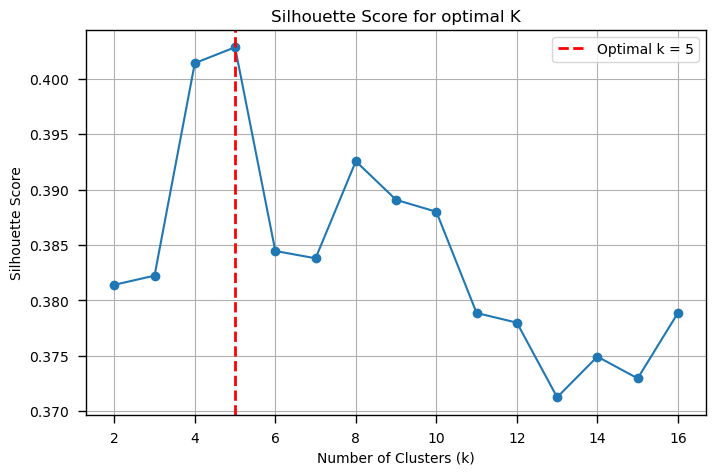

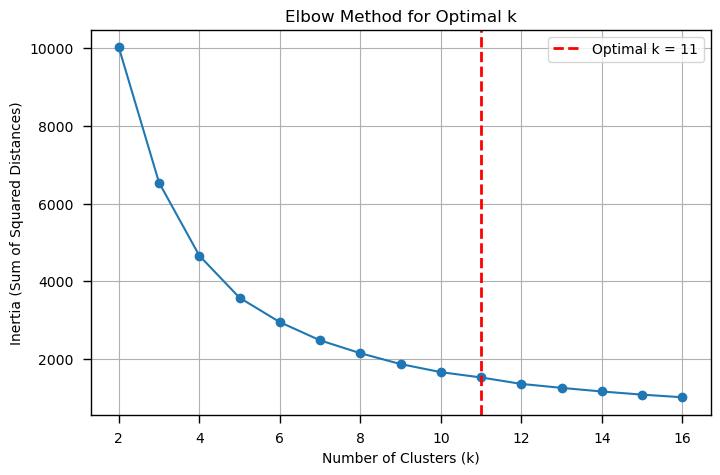

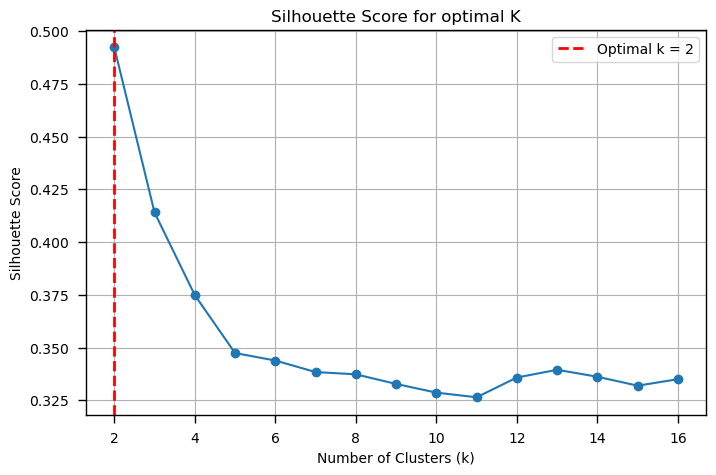

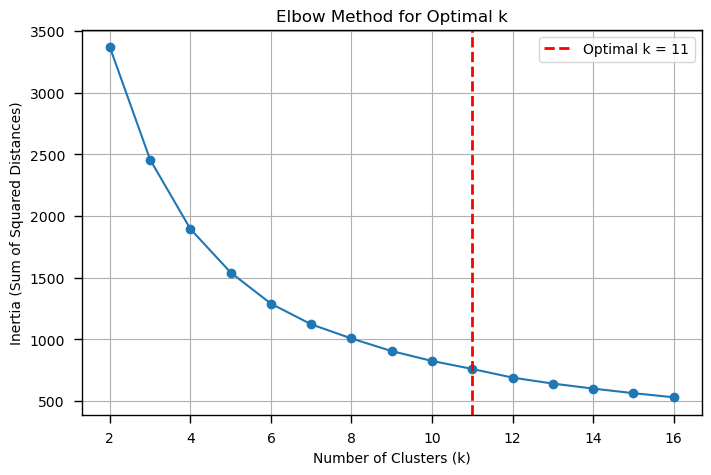

In [ ]:
optimal_silhouette_GCU,optimal_elbow_GCU=preform_clust_opt(GCU_pca,'/zfshomes/lperez/ba_and_ma/final_thesis_data/kluster_output/domain_exploration_GCU',15)
optimal_silhouette_CGU,optimal_elbow_CGU=preform_clust_opt(CGU_pca,'/zfshomes/lperez/ba_and_ma/final_thesis_data/kluster_output/domain_exploration_CGU',15)


In [40]:
labels_GCU = np.concatenate([optimal_silhouette_GCU, np.full(3200, 10)])
labels_CGU = np.concatenate([np.full(3200, 10),optimal_silhouette_CGU])

print(optimal_silhouette_GCU.shape)
print(optimal_silhouette_CGU.shape)
print(labels_GCU.shape)
print(labels_CGU.shape)

(3200,)
(3200,)
(6400,)
(6400,)


In [41]:
visualize_traj_PCA_onepanel(X_pca,
                            color_mappings=labels_GCU,
                            savepath='/zfshomes/lperez/ba_and_ma/thesis_figures/PCA/domainsearch_GCU',
                            title='optimal sillohuette clustering in embedding space',
                            clustering=False)

visualize_traj_PCA_onepanel(X_pca,
                            color_mappings=labels_CGU,
                            title='optimal sillohuette clustering in embedding space',
                            savepath='/zfshomes/lperez/ba_and_ma/thesis_figures/PCA/domainsearch_CGU',
                            clustering=False
                            )

# Replicate maps visualization of the labels from the low dimensional embeddings

In [7]:
import numpy as np
domain_exploration_GCU = np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/kluster_output/domain_exploration_GCUkluster_labels_5clust.npy')
domain_exploration_CGU = np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/kluster_output/domain_exploration_CGUkluster_labels_2clust.npy')

In [13]:
print(domain_exploration_GCU.shape,domain_exploration_CGU.shape)

(3200,) (3200,)


In [ ]:
from matplotlib import cm
import sys
sys.path.append("/zfshomes/lperez/ba_and_ma/final_thesis_scripts/pypure/utilities/")
from Viz import label_iterator,traj_view_replicates_10by10
#specifications
replicate_frames=((([80]*20)+([160]*10))) 
#grab list
reformatted_domain_exploration_GCU=label_iterator(labels=domain_exploration_GCU,frame_list=replicate_frames)
reformatted_domain_exploration_CGU=label_iterator(labels=domain_exploration_CGU,frame_list=replicate_frames)
#make figures
traj_view_replicates_10by10(reformatted_domain_exploration_GCU,title='substates of GCU',savepath='/zfshomes/lperez/ba_and_ma/thesis_figures/independent_analysis/GCU_substates_replicatemap',clustering=False,colormap=cm.plasma_r) 
traj_view_replicates_10by10(reformatted_domain_exploration_CGU,title='substates of CGU',savepath='/zfshomes/lperez/ba_and_ma/thesis_figures/independent_analysis/CGU_substates_replicatemap',clustering=False,colormap=cm.plasma_r) 

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 160 and the array at index 30 has size 80

# This is electrostatics lol and here I was wondering why it took so long

In [1]:
CCU_GCU_estatics = '/zfshomes/lperez/ba_and_ma/datagen/CCU_GCU_estats'
CCU_CGU_estatics = '/zfshomes/lperez/ba_and_ma/datagen/CCU_CGU_estats'

In [2]:
#Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#Some other necessary imports
import sys
sys.path.append("/zfshomes/lperez/ba_and_ma/final_thesis_scripts/pypure/utilities/")
import numpy as np
from Convenience import test_list_2
from t_a_Manipulation import replicates_to_featurematrix
from Viz import create_2d_color_mappings,visualize_traj_PCA_onepanel,traj_view_replicates_10by10,label_iterator
from dim_reduction import run_PCA
from Clustering import format_replicate_for_clust,preform_clust,preform_clust_opt

In [4]:
#Lets begin with just CCU_GCU
import os
from pathlib import Path

individual_files = list(Path(CCU_GCU_estatics).glob("*"))
final_array_GCU=[]
for i in individual_files:
    final_array_GCU.append(np.load(i))
final_array_GCU=np.array(final_array_GCU)
print(final_array_GCU.shape)



(3198, 495, 495)


In [5]:
#Lets begin with just CCU_GCU
import os
from pathlib import Path

individual_files = list(Path(CCU_CGU_estatics).glob("*"))
final_array_CGU=[]
for i in individual_files:
    final_array_CGU.append(np.load(i))
final_array_CGU=np.array(final_array_CGU)
print(final_array_CGU.shape)



(3199, 495, 495)


In [6]:
feature_matrix_estatics=format_replicate_for_clust([final_array_GCU,final_array_CGU,])

'/zfshomes/lperez/ba_and_ma/final_thesis_scripts/jupyter/estatics_finally.ipynb'

'/zfshomes/lperez/ba_and_ma/final_thesis_scripts/jupyter/estatics_finally.ipynb'

In [8]:
np.save('/zfshomes/lperez/ba_and_ma/final_thesis_data/feature_matrices/feature_matrix_estatics',feature_matrix_estatics,allow_pickle=True)

OSError: [Errno 5] Input/output error

In [10]:

import sys
sys.path.append("/zfshomes/lperez/ba_and_ma/final_thesis_scripts/pypure/utilities/")
import numpy as np
from Convenience import test_list_2
from t_a_Manipulation import replicates_to_featurematrix
from Viz import create_2d_color_mappings,visualize_traj_PCA_onepanel,traj_view_replicates_10by10,label_iterator
from dim_reduction import run_PCA



In [17]:
X_pca,weights,explained_variance_ratio_=run_PCA(feature_matrix_estatics,n=395)

X_pca shape (new data): (6397, 395)
the explained variance ratio is [0.11247228 0.03925375 0.03686798 0.02714852 0.02261798 0.01891409
 0.01814154 0.01766379 0.01551108 0.01507585 0.01393498 0.01337315
 0.01312172 0.01202208 0.01158629 0.01122001 0.01079269 0.01021519
 0.01002059 0.00974099 0.00959736 0.00924882 0.00902011 0.00830489
 0.00797495 0.00784618 0.00752893 0.00718167 0.00697576 0.0067929
 0.00670484 0.00635681 0.00618317 0.00615693 0.00583146 0.00570749
 0.00556524 0.0053469  0.00509889 0.00501442 0.0047992  0.00472557
 0.00466119 0.00437805 0.00427522 0.00422999 0.00410891 0.00410322
 0.0038202  0.00377424 0.00367522 0.00357277 0.00345365 0.00339487
 0.00321335 0.00306841 0.00299644 0.00294444 0.0027368  0.00268741
 0.00215163 0.00207664 0.00201045 0.00180551 0.00178045 0.00171504
 0.00166705 0.00151256 0.00147869 0.00143663 0.00139627 0.0013833
 0.00132975 0.00127911 0.00124775 0.00122869 0.00120158 0.00117556
 0.00116947 0.00112095 0.00110918 0.00106037 0.00105843 0.00103

In [18]:
print(np.sum(explained_variance_ratio_))

0.7925211


In [ ]:
kmeans_labels_2k=optimal_k_silhouette_labels.tolist()
visualize_traj_PCA_onepanel(X_pca,color_mappings=kmeans_labels_2k,title="Two Subsystems labeled PCA of GCU and CGU Systems K=2"
                            ,savepath="/zfshomes/lperez/ba_and_ma/thesis_figures/PCA/estatics_distinct_systems_frames",clustering=False)

In [ ]:
from t_a_Manipulation import create_dataframe_from_adjacency


CCU_GCU_avgtraj = np.mean(final_array_GCU,axis=0)
CCU_CGU_avgtraj = np.mean(final_array_CGU,axis=0)
system_names=['GCU','CGU']


#create dataframe from values
CCU_GCU_df=create_dataframe_from_adjacency(CCU_GCU_avgtraj,system_names[0],weights[0])
CCU_CGU_df=create_dataframe_from_adjacency(CCU_CGU_avgtraj,system_names[1],weights[0])
final_df=pd.merge(CCU_GCU_df,CCU_CGU_df,on=["comparison","pca_weight"], how="inner")
final_df['abs_diff']=abs(final_df['GCU_Hbond']-final_df['CGU_Hbond'])
final_df['directional_diff_g_to_c']=abs(final_df['GCU_Hbond']-final_df['CGU_Hbond'])
final_df['circos_scaled_differences']=(final_df['abs_diff'] - np.min(final_df['abs_diff'])) / (np.max(final_df['abs_diff']) - np.min(final_df['abs_diff']))

#check
print(final_df)
final_df.to_pickle("/zfshomes/lperez/ba_and_ma/final_thesis_data/estatics_database.pkl")


[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

/zfshomes/lperez/BIN/miniconda3/envs/mdproj/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


       comparison   GCU_Hbond  pca_weight   CGU_Hbond  abs_diff  \
0             1-2 -101.187500   -0.004692 -104.375000  3.187500   
1             1-3  -40.406250    0.003871  -37.937500  2.468750   
2             1-4  -41.812500   -0.001871  -43.031250  1.218750   
3             1-5  -39.937500    0.000221  -39.750000  0.187500   
4             1-6  -15.375000    0.000296  -15.210938  0.164062   
...           ...         ...         ...         ...       ...   
121766    491-493  -38.281250   -0.001778  -39.437500  1.156250   
121767    491-494   93.625000   -0.002067   92.500000  1.125000   
121768    492-493  -10.140625    0.001086   -9.476562  0.664062   
121769    492-494  -90.125000   -0.002445  -91.875000  1.750000   
121770    493-494 -148.625000   -0.000708 -149.375000  0.750000   

        directional_diff_g_to_c  circos_scaled_differences  
0                      3.187500                   0.107117  
1                      2.468750                   0.083008  
2           

In [ ]:
final_df['weights_squared']=final_df['pca_weight']**2
final_df

/zfshomes/lperez/BIN/miniconda3/envs/mdproj/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,comparison,GCU_Hbond,pca_weight,CGU_Hbond,abs_diff,directional_diff_g_to_c,circos_scaled_differences,weights_squared
0,1-2,-101.187500,-0.004692,-104.375000,3.187500,3.187500,0.107117,2.201535e-05
1,1-3,-40.406250,0.003871,-37.937500,2.468750,2.468750,0.083008,1.498801e-05
2,1-4,-41.812500,-0.001871,-43.031250,1.218750,1.218750,0.040955,3.500247e-06
3,1-5,-39.937500,0.000221,-39.750000,0.187500,0.187500,0.006302,4.878543e-08
4,1-6,-15.375000,0.000296,-15.210938,0.164062,0.164062,0.005516,8.756253e-08
...,...,...,...,...,...,...,...,...
121766,491-493,-38.281250,-0.001778,-39.437500,1.156250,1.156250,0.038879,3.159786e-06
121767,491-494,93.625000,-0.002067,92.500000,1.125000,1.125000,0.037811,4.273586e-06
121768,492-493,-10.140625,0.001086,-9.476562,0.664062,0.664062,0.022324,1.180451e-06
121769,492-494,-90.125000,-0.002445,-91.875000,1.750000,1.750000,0.058838,5.978311e-06


In [ ]:
final_df=final_df.sort_values(by='weights_squared',ascending=False)
final_df.head(20)

/zfshomes/lperez/BIN/miniconda3/envs/mdproj/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,comparison,GCU_Hbond,pca_weight,CGU_Hbond,abs_diff,directional_diff_g_to_c,circos_scaled_differences,weights_squared
74424,186-426,-37.437500,0.046170,-10.273438,27.156250,27.156250,0.912598,0.002132
115147,379-426,-138.000000,0.045932,-108.250000,29.750000,29.750000,1.000000,0.002110
42254,379-95,-32.562500,-0.040497,-52.781250,20.218750,20.218750,0.679688,0.001640
107492,325-412,-76.187500,-0.040312,-99.500000,23.312500,23.312500,0.783691,0.001625
74990,188-379,-155.625000,0.039286,-138.625000,17.000000,17.000000,0.571289,0.001543
101603,293-427,28.687500,0.037780,51.750000,23.062500,23.062500,0.775391,0.001427
68728,168-427,-4.703125,-0.035638,-26.234375,21.531250,21.531250,0.723633,0.001270
102431,297-461,-83.250000,0.032906,-64.562500,18.687500,18.687500,0.627930,0.001083
74116,185-426,-20.687500,0.032258,-0.918945,19.765625,19.765625,0.664551,0.001041
120287,440-442,-24.828125,0.032257,-4.757812,20.062500,20.062500,0.674316,0.001041


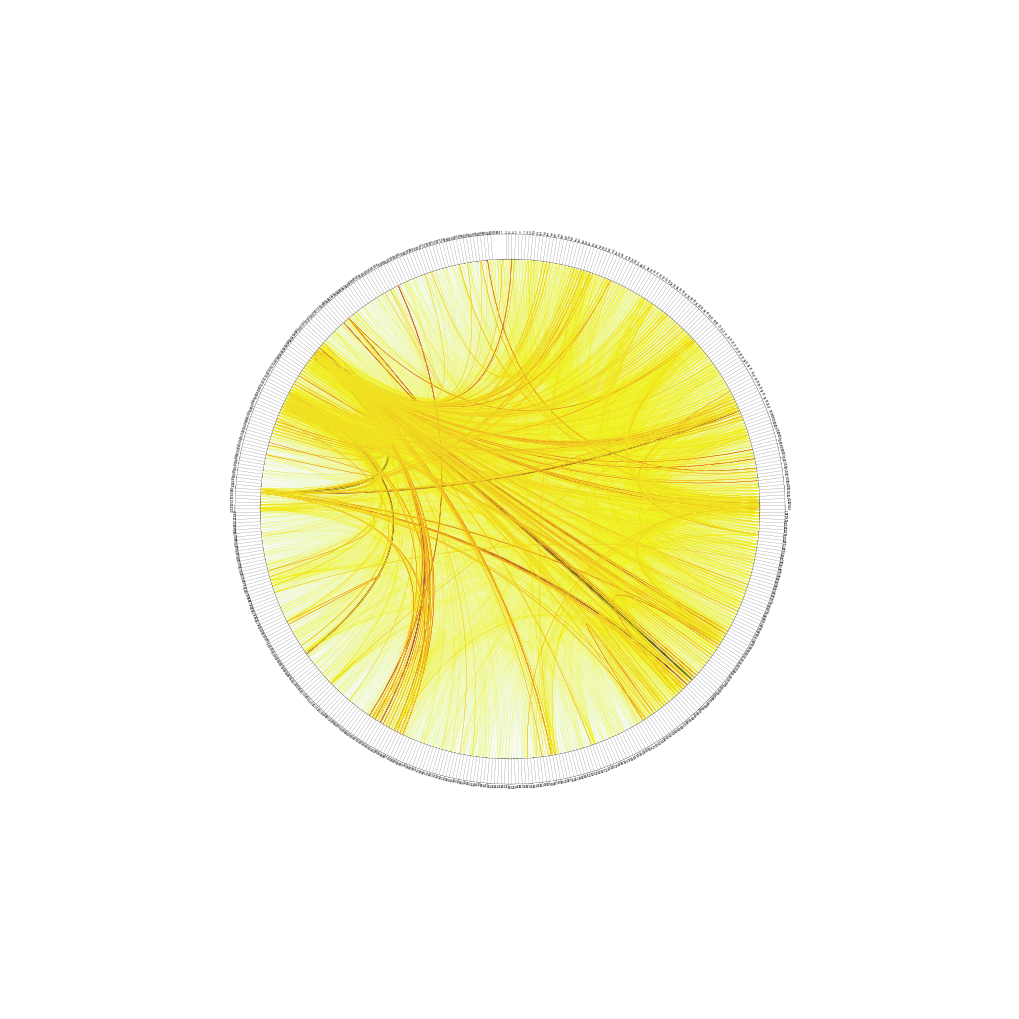

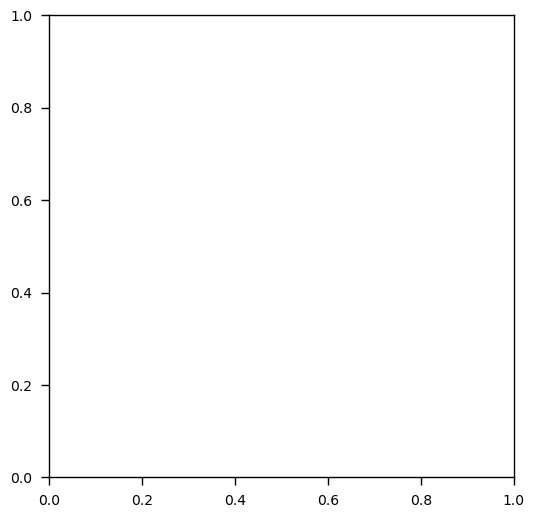

In [ ]:
from Viz import make_MDCircos_object, highlighted_mdcircos_graph,base_mdcircos_graph
import matplotlib.cm as cm

residue_indexes = final_array_GCU[0, 0, 1:].astype(int).tolist()
diff_dict_all = final_df.set_index('comparison')['weights_squared'].to_dict()

Mdcircos_plt=make_MDCircos_object(residue_indexes)
base_mdcircos_graph(Mdcircos_plt,residue_dict=diff_dict_all,savepath="/zfshomes/lperez/ba_and_ma/thesis_figures/Circos/estatics_CCU_PCA_Circos_",scale_factor=1,colormap=cm.plasma_r)


In [ ]:
final_df=final_df[["comparison","weights_squared"]]
final_df.head(20)

KeyError: "['weights_squared'] not in index"